<a href="https://colab.research.google.com/github/aahiljivani/RL-Gymnasium-Agents/blob/main/Monte_Carlo_BlackJack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import gymnasium as gym
from collections import defaultdict
from tqdm import tqdm

In [ ]:
# sab = False specifies whether we follow the rules outlined in S & B RL textbook
env = gym.make("Blackjack-v1", sab = False, render_mode = 'rgb_array')

In [ ]:
# sample action
env.action_space.sample()

np.int64(1)

In [ ]:
# sample observation space
env.observation_space

Tuple(Discrete(32), Discrete(11), Discrete(2))

In [ ]:
# set dictionaries to carry state action pairs and their returns, frequency should be noted for state action pairs on first visits only per episode
Q_dict = defaultdict(float)
freq = defaultdict(int)


In [ ]:

# We need many episodes for the agent to learn effectively
training = 50_000
print(f'--- Started Training the Monte Carlo Agent on {training} games ---')
gamma = 1.0

for episode in range(training):
    # episode is not terminated
    terminated = False
    # this is the initial state
    state, _ = env.reset() # Extract observation from the tuple

    gamma = 1

    q_list = []


    # while the episode is still running
    while not terminated:
        # we randomly sample an action
        action = env.action_space.sample()
        # we get the next state, reward, terminated value
        next_state, reward, terminated, _,_ =  env.step(action)

        # now we append the current state, action, reward tuple into a list
        q_list.append((state, int(action), reward))
        # set current state to s(t+1)
        state = next_state

    # set G to zero
    G = 0
    visited = set()
    # iterating backwards through the q_list for state action rewards
    for state, action, reward in reversed(q_list):
        # update G
        G = reward + gamma * G
        # if dictionary does not have this state action pair
        if (state, action) not in visited:
            # update frequency of states being visited
            freq[(state,action)] += 1
            # NewEstimate = OldEstimate + (Target - OldEstimate) / Count update formula from Bandits update in Ch.2
            Q_dict[(state, action)] += (G - Q_dict[(state, action)]) / freq[(state, action)]
            visited.add((state,action))

print("\n--- Training Finished ---")

Started Training the Monte Carlo Agent on 50000 games

--- Training Finished ---


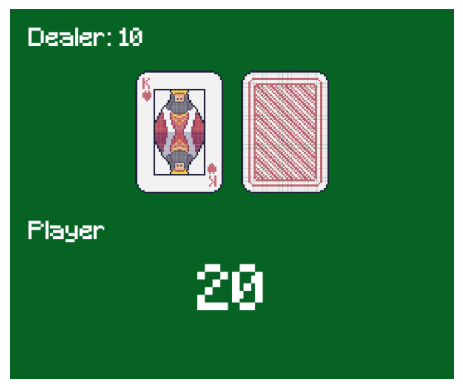

Episode finished with reward: 1.0

Evaluation over 10 episodes:
  Win Rate: 50.00%
  Loss Rate: 20.00%
  Draw Rate: 30.00%


In [ ]:
import gymnasium as gym
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import time


# Initialize win/loss/draw counters to zero before the loop
wins = 0
losses = 0
draws = 0



print("\n--- Starting Visual Evaluation ---")
TEST_EPISODES = 10 # Use a small number to see the animation

for _ in range(TEST_EPISODES):
    state, _ = env.reset()
    terminated = False

    # animation loop
    while not terminated:
        # Clear the previous frame
        ipythondisplay.clear_output(wait=True)

        # Render the environment and get the image frame
        frame = env.render()
        plt.imshow(frame)
        plt.axis('off')
        plt.show()

        # Add a small delay to make the animation watchable
        time.sleep(0.5)

        # --- Agent's Decision Logic ---
        q_stand = Q_dict.get((state, 0), 0)
        q_hit = Q_dict.get((state, 1), 0)

        if q_stand > q_hit:
            action = 0  # Stand
        else:
            action = 1  # Hit

        state, reward, terminated, _, _ = env.step(action)

    # Show the final frame of the episode
    ipythondisplay.clear_output(wait=True)
    frame = env.render()
    plt.imshow(frame)
    plt.axis('off')
    plt.show()

    print(f"Episode finished with reward: {reward}")

    # After the game is over, check the final reward to tally the outcome
    if reward > 0:
        wins += 1
    elif reward < 0:
        losses += 1
    else:
        draws += 1


    time.sleep(2) # Pause before starting the next episode

env.close()

# Print the agent's result.
print(f"\nEvaluation over {TEST_EPISODES} episodes:")
print(f"  Win Rate: {wins / TEST_EPISODES:.2%}")
print(f"  Loss Rate: {losses / TEST_EPISODES:.2%}")
print(f"  Draw Rate: {draws / TEST_EPISODES:.2%}")